In [1]:
import numpy as np
import pandas as pd
import os
import mne
from mne import combine_evoked
from mne.io import read_raw_ctf
from mne.minimum_norm import apply_inverse

In [2]:
raw_file_sub1 = os.path.join(os.getcwd(),"derivatives/sub-0001/ses-0001/meg/sub-0001_ses-0001_task-mapping_ds_run-01_meg.ds")

In [3]:
raw = read_raw_ctf(raw_file_sub1)
n_times_run1 = raw.n_times


ds directory : /home/hp/Documents/AUDITORY_MEG/CTFDATASET/derivatives/sub-0001/ses-0001/meg/sub-0001_ses-0001_task-mapping_ds_run-01_meg.ds
    res4 data read.
    hc data read.
    Separate EEG position data file not present.
    Quaternion matching (desired vs. transformed):
      -2.66   70.21    0.00 mm <->   -2.66   70.21    0.00 mm (orig :  -57.68   47.83 -256.60 mm) diff =    0.000 mm
       2.66  -70.21    0.00 mm <->    2.66  -70.21    0.00 mm (orig :   48.49  -43.96 -263.70 mm) diff =    0.000 mm
      98.15    0.00    0.00 mm <->   98.15    0.00    0.00 mm (orig :   61.57   71.10 -238.45 mm) diff =    0.000 mm
    Coordinate transformations established.
    Polhemus data for 3 HPI coils added
    Device coordinate locations for 3 HPI coils added
Picked positions of 3 EEG channels from channel info
    3 EEG locations added to Polhemus data.
    Measurement info composed.
Finding samples for /home/hp/Documents/AUDITORY_MEG/CTFDATASET/derivatives/sub-0001/ses-0001/meg/sub-0001

In [4]:
raw.set_channel_types({"HEOG": "eog", "VEOG": "eog", "ECG": "ecg"})


Measurement date,"January 12, 2015 12:18:00 GMT"
Experimenter,JC
Participant,0001
Digitized points,6 points
Good channels,"2 Stimulus, 2 misc, 26 Reference Magnetometers, 273 Magnetometers, 1 ECG, 2 EOG"
Bad channels,None
EOG channels,"VEOG, HEOG"
ECG channels,ECG
Sampling frequency,2400.00 Hz
Highpass,0.00 Hz
Lowpass,1200.00 Hz


In [5]:
events, event_id = mne.events_from_annotations(raw)

Used Annotations descriptions: ['UADC001']


In [10]:
events.shape

(927, 3)

In [11]:
ecg_evoked = mne.preprocessing.create_ecg_epochs(raw,baseline=(None,0))


Using channel ECG to identify heart beats.
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 24000 samples (10.000 s)

Number of ECG events detected : 858 (average pulse 62 / min.)
Not setting metadata
858 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
Loading data for 858 events and 2401 original time points ...
1 bad epochs dropped


No projector specified for this dataset. Please consider the method self.add_proj.
Removing 5 compensators from info because not all compensation channels were picked.
Removing 5 compensators from info because not all compensation channels were picked.
Removing 5 compensators from info because not all compensation channels were picked.


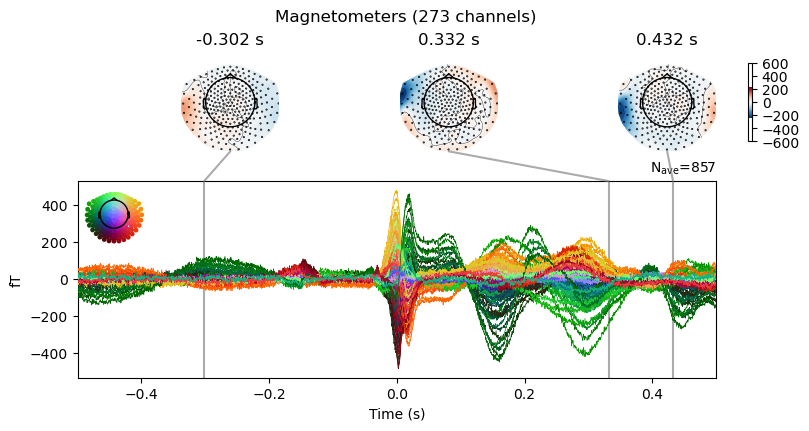

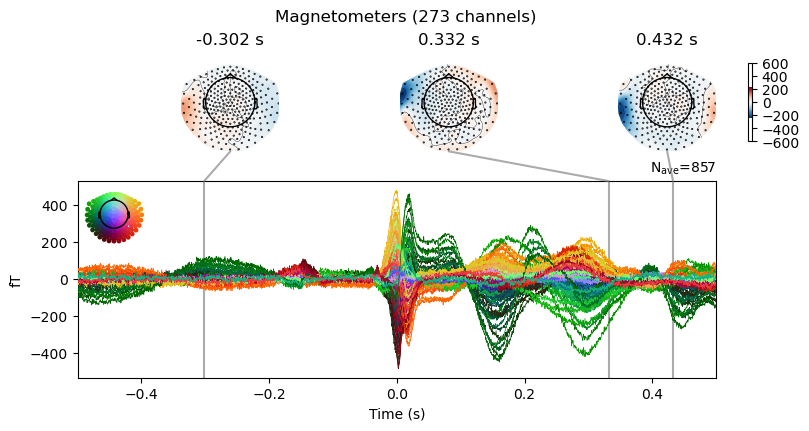

In [12]:
ecg_evoked.average().plot_joint()

In [13]:
eog_evoked = mne.preprocessing.create_eog_epochs(raw,baseline=(None,0))


Using EOG channels: VEOG, HEOG
EOG channel index for this subject is: [303 304]


Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel VEOG for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 24000 samples (10.000 s)

Now detecting blinks and generating corresponding events
Found 425 significant peaks
Number of EOG events detected: 425
Not setting metadata
425 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
Loading data for 425 events and 2401 original time points ...
0 bad epochs dropped


No projector specified for this dataset. Please consider the method self.add_proj.
Removing 5 compensators from info because not all compensation channels were picked.
Removing 5 compensators from info because not all compensation channels were picked.
Removing 5 compensators from info because not all compensation channels were picked.


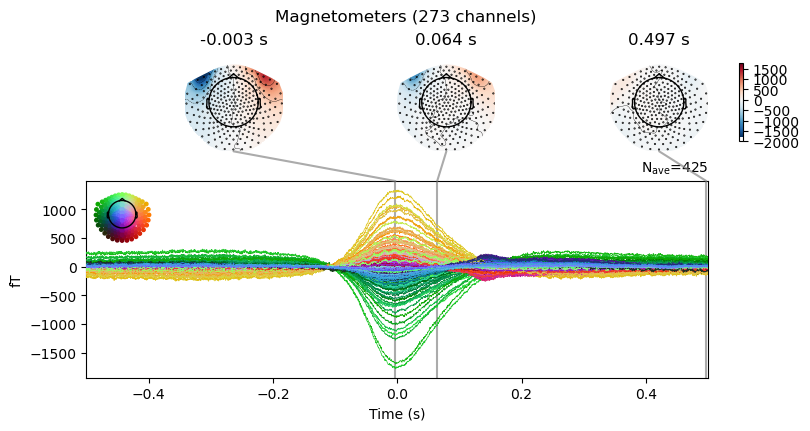

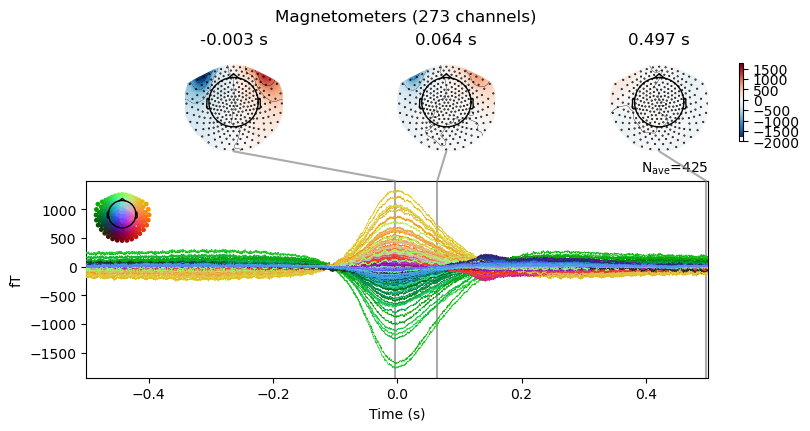

In [14]:
eog_evoked.average().plot_joint()

In [ ]:
ecg_projs, ecg_events = mne.preprocessing.compute_proj_ecg(raw,ch_name="ECG",n_mag=3)

Reading 0 ... 1976362  =      0.000 ...   823.484 secs...


: 

In [8]:
eog_events = mne.preprocessing.find_eog_events(raw)
ecg_events = mne.preprocessing.find_ecg_events(raw)

Using EOG channels: VEOG, HEOG
EOG channel index for this subject is: [303 304]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 120000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 426 significant peaks
Number of EOG events detected: 426
Using channel ECG to identify heart beats.
Setting up band-pass filter from 5 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequen

In [29]:
eog_proj = mne.preprocessing.compute_proj_eog(raw, n_grad=1, n_mag=1, n_eeg=0, average=True)
ecg_proj = mne.preprocessing.compute_proj_ecg(raw, n_grad=1, n_mag=1, n_eeg=0, average=True)


Reading 0 ... 9881811  =      0.000 ...   823.484 secs...


MemoryError: Unable to allocate 22.5 GiB for an array with shape (306, 9881812) and data type float64

In [10]:
raw.add_proj(eog_proj + ecg_proj)
raw.apply_proj()

NameError: name 'eog_proj' is not defined

In [27]:
eog_events = mne.preprocessing.find_eog_events(raw)
ecg_events = mne.preprocessing.find_ecg_events(raw)


RuntimeError: No EOG channel(s) found

In [25]:
eog_epochs = mne.preprocessing.create_eog_epochs(raw, baseline=(-0.5, -0.2))


RuntimeError: No EOG channel(s) found

No projector specified for this dataset. Please consider the method self.add_proj.
Removing 5 compensators from info because not all compensation channels were picked.
Removing 5 compensators from info because not all compensation channels were picked.
Removing 5 compensators from info because not all compensation channels were picked.


/home/hp/miniconda3/envs/compneuro/lib/python3.10/site-packages/mne/viz/topomap.py:976: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for col in cont.collections:
/home/hp/miniconda3/envs/compneuro/lib/python3.10/site-packages/mne/viz/topomap.py:976: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for col in cont.collections:
/home/hp/miniconda3/envs/compneuro/lib/python3.10/site-packages/mne/viz/topomap.py:976: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for col in cont.collections:


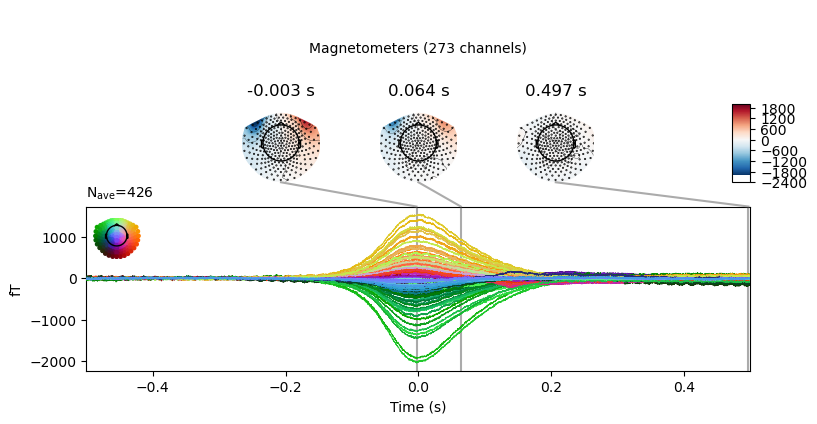

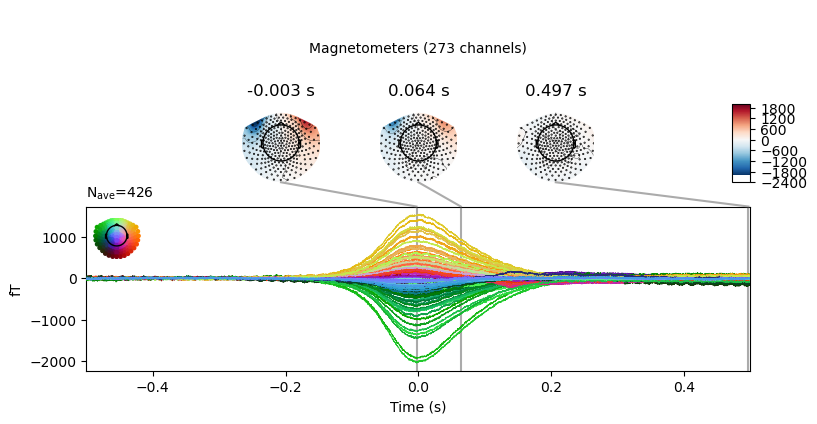

In [8]:
eog_epochs.average().plot_joint()